## INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SANTA CATARINA
# CURSO DE GRADUAÇÃO EM ENGENHARIA ELETRÔNICA 
DISCIPLINA: DSP2 

Atividade Prática - FILTROS

Aluno Marcelo Brancalhão Gaspar

Professor Fernando Santana Pacheco


Florianópolis, SC - 17 de Maio de 2022
```



# Identificação da frequência do ruído

Através de uma análise, do espectrograma do sinal através do software OcenAudio,
conforme figura 1 a seguir, é possível identificar que o ruído está localizado em 8 KHz


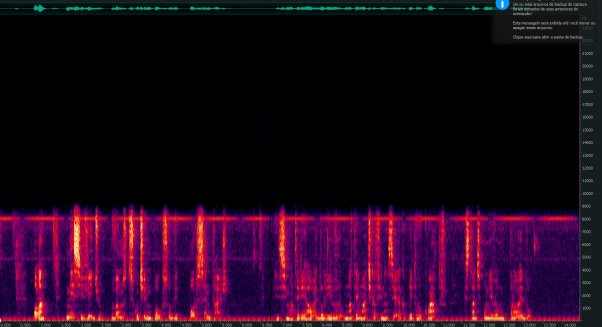

# Parâmetros do filtro no OcenAudio

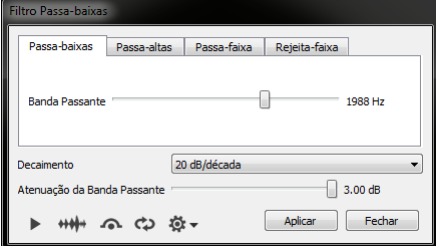

# Resultado pós filtro no OcenAudio
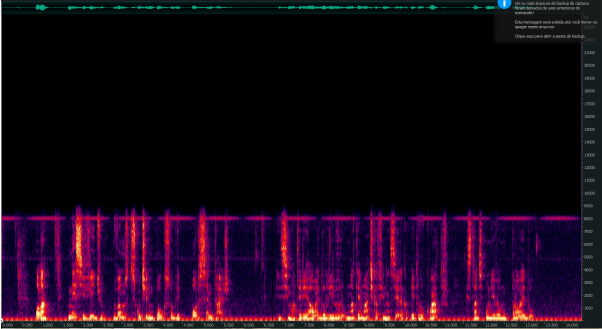

# Coeficientes do filtro

-1.041233056079791e-19,
1.078318326143337e-05,
2.2793056498882385e-05,
-4.147648115233865e-05
,-0.00019817520158495788,
-0.0002726151638974577,
2.352084862826222e-18,
0.0006235533354561457,
0.001077169501552987,
0.0005881151582466505,
-0.001034540073421002,
-0.00270

In [6]:
!pip install simpleaudio

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import math
import pandas as pd
from scipy import signal

In [8]:
import simpleaudio as sa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


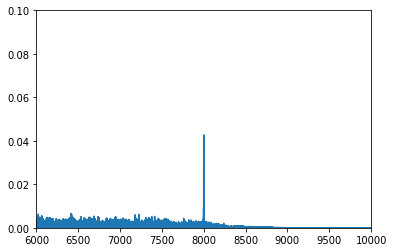

In [9]:
fig, ax = plt.subplots()
[fs,audio] = wav.read('fala-tom-alta-freq.wav')

comRuido = audio/max(abs(audio))
fourier = np.fft.fft(comRuido)
n = fourier.size
freq = np.fft.fftfreq(n, 1/fs)
plt.xlim(6000,10000)
plt.ylim(0,0.1)
plt.plot(freq,abs(fourier)*2/fs)
plt.show()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
coef = pd.read_csv('coeficientes.csv',sep=',',header=None)
b=coef.values.ravel()
w, h = signal.freqz(b,fs=fs)


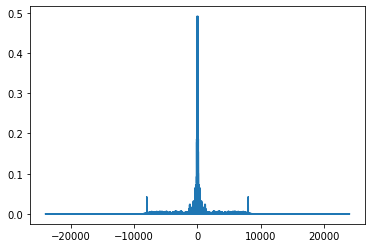

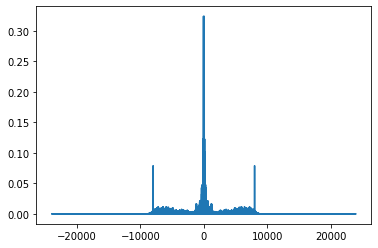

In [12]:
filtrado = signal.lfilter(b,1,comRuido)
filtrado = filtrado/max(abs(filtrado))
wav.write('audio-sem-ruido.wav',fs,filtrado)
plt.plot(freq,abs(fourier)*2/fs)
filtradoFourier = np.fft.fft(filtrado)
plt.show()
n = filtradoFourier.size
freq = np.fft.fftfreq(n, 1/fs)
plt.plot(freq,abs(filtradoFourier)*2/fs)
plt.show()